# Map Search

In [7]:
BEIJING, CHANGCHUN, URUMCHI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEJING CHANGCHUN URUMCHI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWTORK
""".split()

In [8]:
dictionary = {}

In [16]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMCHI: [BEIJING],
    BEIJING: [URUMCHI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, NEWYORK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [17]:
import networkx as nx   # 开发图论与复杂网络工具的库

In [20]:
%matplotlib inline     # 只在jupyter中用到，可以在这里面生成图像

In [21]:
graph = connection

In [22]:
g = nx.Graph(graph)  # 生成graph的无向图

C:\Users\15824\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


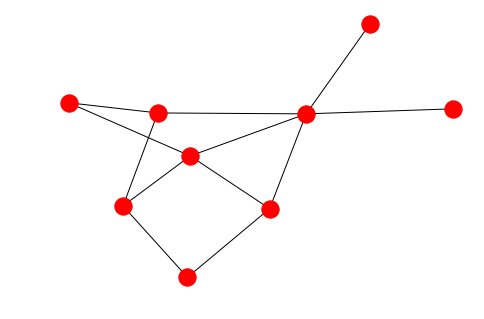

In [23]:
nx.draw(g)

In [35]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]  
    seen = set()
    
    while pathes:
        path = pathes.pop(0)  # 弹出索引为0的元素,弹出之后就不在列表里面了
        froniter = path[-1]   # froniter是倒数第一个元素
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors:
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])   # 例如[[changchun] ] 执行一次之后[[changchun],[chuangchun,beijing]]；不对，第一个[changchun] 已经弹出去了，只剩后面的
                print(path + [s])
        pathes = sorted(pathes, key=len)  # 获得最小换乘
        
        seen.add(froniter)

In [36]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
        
        seen.add(froniter)

In [37]:
nagivator(CHANGCHUN, NEWYORK, g)

['CHANGCHUN', 'BEJING']
['CHANGCHUN', 'BEJING', 'CHANGCHUN']
['CHANGCHUN', 'BEJING', 'URUMCHI']
['CHANGCHUN', 'BEJING', 'WUHAN']
['CHANGCHUN', 'BEJING', 'SHENZHEN']


['CHANGCHUN', 'BEJING', 'NEWTORK']

In [38]:
connection_2 = {
    0: [1, 5],
    1: [0, 2],
    2: [1, 3],
    3: [2, 4],
    4: [3],
    5: [0, 6],
    6: [5, 7],
    7: [6]
}

C:\Users\15824\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


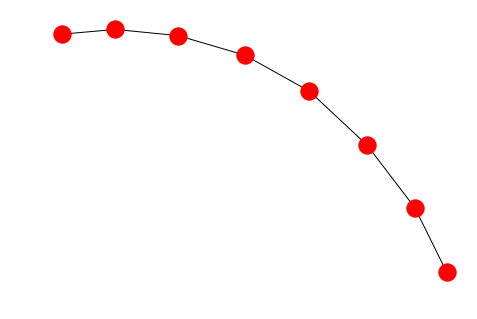

In [39]:
nx.draw(nx.Graph(connection_2))

In [40]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [41]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
        
        seen.add(froniter)

In [42]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [43]:
def draw_route(routes):
    print('-->'.join(routes))

In [44]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

['CHANGCHUN', 'BEJING']
['CHANGCHUN', 'BEJING', 'URUMCHI']
['CHANGCHUN', 'BEJING', 'CHANGCHUN']
['CHANGCHUN', 'BEJING', 'WUHAN']
['CHANGCHUN', 'BEJING', 'SHENZHEN']
['CHANGCHUN', 'BEJING', 'NEWTORK']
['CHANGCHUN', 'BEJING', 'URUMCHI', 'BEJING']
['CHANGCHUN', 'BEJING', 'WUHAN', 'SHANGHAI']
['CHANGCHUN', 'BEJING', 'WUHAN', 'BEJING']
['CHANGCHUN', 'BEJING', 'WUHAN', 'GUANGZHOU']
['CHANGCHUN', 'BEJING', 'SHENZHEN', 'WUHAN']
CHANGCHUN-->BEJING-->SHENZHEN-->BANGKOK


# Sentence Generation

In [45]:
decimal_grammer = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [46]:
grammer = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [47]:
import random

In [49]:
def parse_grammer(grammer_str, sep='=>'):
    grammer = {}
    for line in grammer_str.split('\n'):
        line = line.strip()   # 该方法删除某字符串中开头结尾处等于参数中的元素，若参数为空，则默认删除空白符，包括（'\n','\r','\t',''）
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammer[target.strip()] = [r.split() for r in rules.split('|')]
    return grammer

In [50]:
g = parse_grammer(grammer)

In [51]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [52]:
def gene(grammer_parsed, target='sentence'):
    if target not in grammer_parsed: return target
    
    rule = random.choice(grammer_parsed[target])
    return ''.join(gene(grammer_parsed, target=r) for r in rule if r != 'null')

In [53]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [60]:
gene(g)

'这个小猫看见一个桌子'

In [56]:
for i in range(10):
    print(gene(parse_grammer(decimal_grammer, sep='='), target='expression'))

1-3/0-70
8*0-5+9
2/1-4*1
5/3-9+7
3+7/0/0
0*3+2*86
5+8*6+3
9-6/1-8
5-9*3+9
07+7/3+7
